In [1]:
import sys
import os
possible_paths = [
        '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set',
        '/Users/lunjizhu/Desktop/MATH 285J Project Workspace/spectral_clustering_finance/data',
        'D:/spectral_clustering_finance/data/drive-download-20250531T145738Z-1-001/CRSP Data Set',
        '/Users/yifangu/Desktop/MATH 285J/285J Project/spectral_clustering_finance/data'
    ]

path = None
for p in possible_paths:
    if os.path.isdir(p):
        path = p
        print(f"Using data path: {path}")
        break

if path is None:
    print("Error: No valid data path found.")
    sys.exit(1)

Using data path: /Users/lunjizhu/Desktop/MATH 285J Project Workspace/spectral_clustering_finance/data


In [2]:
from utils.returns import *
from utils.trader import execute_trading_strategy
from utils.helper import *
import time
import matplotlib.pyplot as plt

In [3]:
eligible_dates_txt_output = path + '/eligible_dates.txt'
eligible_dates = get_eligible_date_paths_from_file(eligible_dates_txt_output)

Successfully read 5269 paths from /Users/lunjizhu/Desktop/MATH 285J Project Workspace/spectral_clustering_finance/data/eligible_dates.txt


In [4]:
print(f"Eligible dates loaded: {eligible_dates}")

Eligible dates loaded: ['/Users/lunjizhu/Desktop/MATH 285J Project Workspace/spectral_clustering_finance/data/2000/20000103.csv.gz', '/Users/lunjizhu/Desktop/MATH 285J Project Workspace/spectral_clustering_finance/data/2000/20000316.csv.gz', '/Users/lunjizhu/Desktop/MATH 285J Project Workspace/spectral_clustering_finance/data/2000/20000331.csv.gz', '/Users/lunjizhu/Desktop/MATH 285J Project Workspace/spectral_clustering_finance/data/2000/20000414.csv.gz', '/Users/lunjizhu/Desktop/MATH 285J Project Workspace/spectral_clustering_finance/data/2000/20001218.csv.gz', '/Users/lunjizhu/Desktop/MATH 285J Project Workspace/spectral_clustering_finance/data/2001/20010102.csv.gz', '/Users/lunjizhu/Desktop/MATH 285J Project Workspace/spectral_clustering_finance/data/2001/20010103.csv.gz', '/Users/lunjizhu/Desktop/MATH 285J Project Workspace/spectral_clustering_finance/data/2001/20010104.csv.gz', '/Users/lunjizhu/Desktop/MATH 285J Project Workspace/spectral_clustering_finance/data/2001/20010129.csv.

In [5]:
import pandas as pd
import os

results_path = os.path.join(path, '..', 'results')
results_path = os.path.abspath(results_path)
result_df_k = pd.read_csv(os.path.join(results_path, 'result_khang.csv'))
result_df = pd.read_csv(os.path.join(results_path, 'result.csv'))
result_df_l = pd.read_csv(os.path.join(results_path, 'result_Cluster_Selection.csv'))

In [33]:
# Retrieve the last row of result_df and concatenate it to result_df_l
last_row = result_df.iloc[[-1]]
result_df_l = pd.concat([result_df_l, last_row], ignore_index=True)
print(result_df_l.tail())

   num_dates num_med  num_clusters  win_threshold  cluster_selection  \
4        NaN    self            10          0.001              False   
5        NaN    self            20          0.001              False   
6        NaN    self            30          0.001              False   
7        NaN    self            40          0.001               True   
8        NaN    self            40          0.002               True   

   num_trading_clusters weight_type  winsorize_raw  winsorize_res  \
4                    10     uniform          False          False   
5                    20     uniform          False          False   
6                    30     uniform          False          False   
7                    20     uniform          False          False   
8                     5     uniform          False          False   

   winsor_param  ...  2021-12-16 00:00:00  2021-12-17 00:00:00  \
4           0.0  ...             0.000421             0.001707   
5           0.0  ...

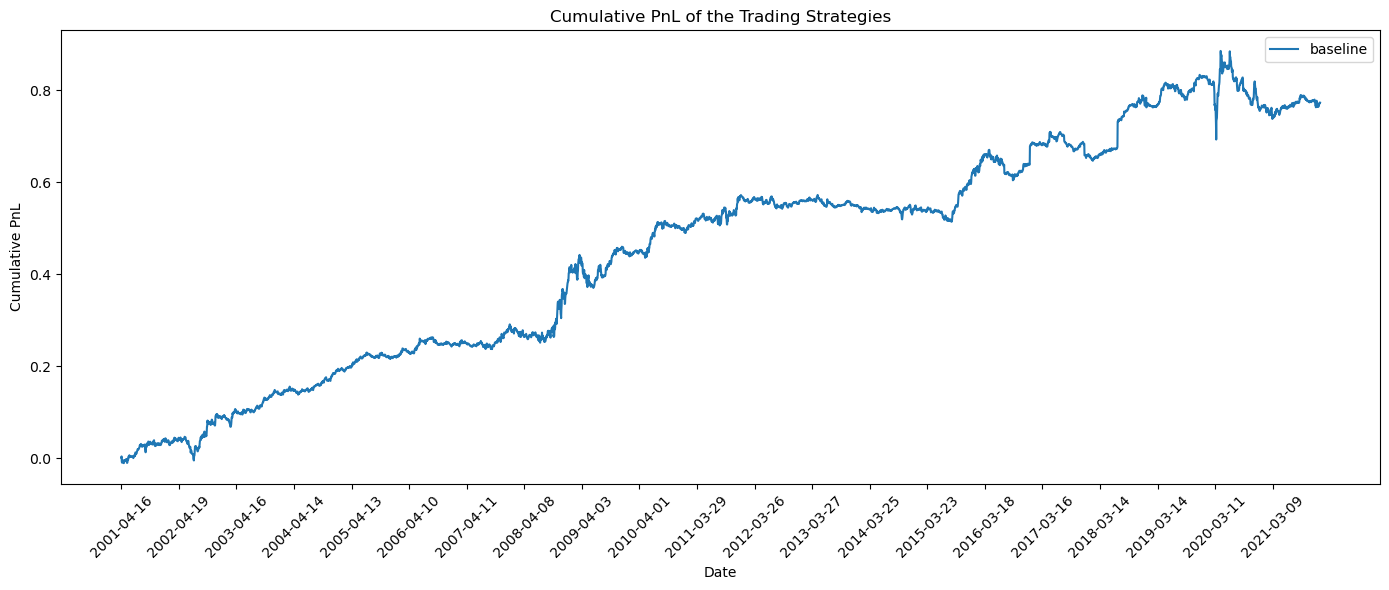

In [10]:
culmulative_pnl = result_df.cumsum(axis=1).T[2]
run_names = [
    'baseline'
    # '2',
    # '3',
    # '4',
    # '5',
    # '6',    
    # '7',
    # '8',
    # '9',
]

culmulative_pnl.plot(figsize=(14, 6))
plt.xlabel('Date')
plt.ylabel('Cumulative PnL')
plt.title('Cumulative PnL of the Trading Strategies')
plt.legend(run_names)

# Add more information to the x-axis
plt.xticks(
    ticks=range(0, len(culmulative_pnl.index), 250),
    labels=[pd.to_datetime(culmulative_pnl.index[i]).date() for i in range(0, len(culmulative_pnl.index), 250)],
    rotation=45
)

plt.tight_layout()
plt.show()

In [7]:
result_df_l_process = result_df_l.iloc[:, 12:]
result_df_l_process

,2001-04-16 00:00:00,2001-04-17 00:00:00,2001-04-18 00:00:00,2001-04-19 00:00:00,2001-04-20 00:00:00,2001-04-23 00:00:00,2001-04-24 00:00:00,2001-04-25 00:00:00,2001-04-26 00:00:00,2001-04-27 00:00:00,...,2021-12-15 00:00:00,2021-12-16 00:00:00,2021-12-17 00:00:00,2021-12-20 00:00:00,2021-12-21 00:00:00,2021-12-22 00:00:00,2021-12-23 00:00:00,2021-12-27 00:00:00,2021-12-28 00:00:00,2021-12-29 00:00:00
0,0.001344,-0.001685,-0.009769,0.000877,0.000819,0.002747,-0.000350,-0.002718,0.000292,0.001030,...,-0.001397,0.000356,0.002560,-0.002923,0.005355,-0.000134,0.001155,0.000671,-0.000743,-0.000216
1,-0.001827,0.002131,-0.015941,-0.000181,-0.001042,0.002360,0.000485,-0.003366,0.000385,0.001168,...,-0.000809,0.000412,0.002088,-0.003236,0.006014,-0.000055,0.001735,0.000816,-0.001322,0.000136
2,-0.000213,0.001730,-0.011277,-0.002017,0.001123,0.003248,0.000469,-0.003107,0.000064,0.001107,...,-0.001094,0.000588,0.002064,-0.002846,0.005865,0.000174,0.002111,0.001333,0.000962,0.000589
3,0.000380,0.000572,-0.001430,-0.000768,-0.000483,0.001948,0.000952,-0.002811,0.000384,0.000903,...,-0.000494,0.000304,0.001865,-0.003378,0.006395,0.000232,0.002387,0.001095,0.001009,0.001074
4,0.000624,0.000537,-0.010914,-0.002320,0.000874,0.004120,0.000335,-0.002555,0.000003,0.001403,...,-0.000936,0.000421,0.001707,-0.003136,0.006158,0.000053,0.002118,0.000579,-0.001203,-0.000210
5,0.001222,-0.001560,-0.008911,0.000846,0.000015,0.002860,0.000706,-0.002787,0.000630,0.001817,...,-0.000155,0.000725,0.002049,-0.003606,0.005818,-0.000047,0.001756,0.001754,0.000788,0.001010
6,0.001279,-0.002438,-0.010158,0.000857,0.000286,0.003521,0.000204,-0.002493,-0.000335,0.001501,...,-0.000579,0.000283,0.002709,-0.003419,0.006086,-0.000411,0.001822,0.001117,0.000715,-0.000307
7,0.000004,0.000112,0.001651,-0.000243,-0.000606,0.001469,0.000488,-0.003494,-0.001143,0.000497,...,-0.000537,0.000093,0.001846,-0.002423,0.005517,-0.000397,0.002280,0.002089,0.000938,0.000961


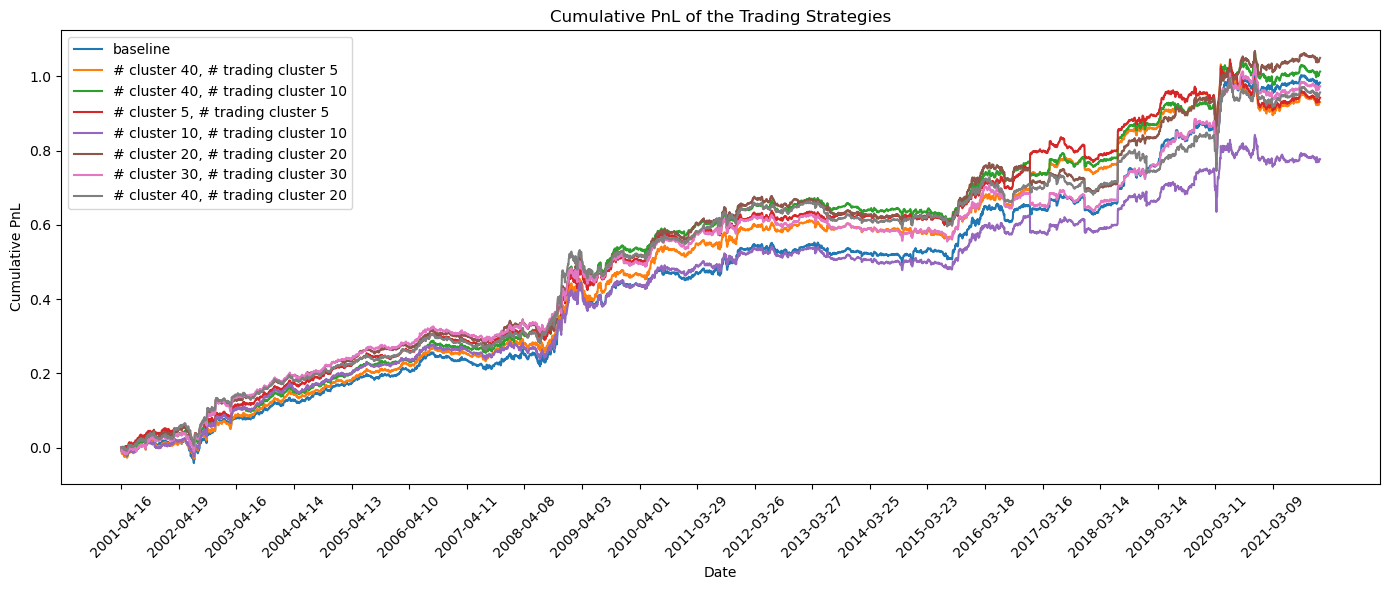

In [10]:
culmulative_pnl_l = result_df_l_process.cumsum(axis=1).T
#culmulative_pnl_l = pd.concat([culmulative_pnl_l, culmulative_pnl], axis=1)
run_names = [
    'baseline',
    '# cluster 40, # trading cluster 5',
    '# cluster 40, # trading cluster 10',
    '# cluster 5, # trading cluster 5',
    '# cluster 10, # trading cluster 10',
    '# cluster 20, # trading cluster 20',
    '# cluster 30, # trading cluster 30',
    '# cluster 40, # trading cluster 20'
]

culmulative_pnl_l.plot(figsize=(14, 6))
plt.xlabel('Date')
plt.ylabel('Cumulative PnL')
plt.title('Cumulative PnL of the Trading Strategies')
plt.legend(run_names)

# Add more information to the x-axis
plt.xticks(
    ticks=range(0, len(culmulative_pnl_l.index), 250),
    labels=[pd.to_datetime(culmulative_pnl_l.index[i]).date() for i in range(0, len(culmulative_pnl_l.index), 250)],
    rotation=45
)

plt.tight_layout()
plt.show()

In [9]:
# Compute final cumulative PnL, Sharpe Ratio, and Success Rate for each run in result_df_l

# Get the columns that are dates (i.e., the pnl columns)
date_cols = result_df_l.columns[12:]

# Compute cumulative pnl for each run
cumulative_pnl = result_df_l[date_cols].cumsum(axis=1)
final_cumulative_pnl = cumulative_pnl.iloc[:, -1]

# Get sharpe ratio and success rate from result_df_l
sharpe_ratios = result_df_l['sharpe_ratio']
success_rates = result_df_l['success_rate']

# Build the summary table
summary_df = pd.DataFrame({
    'Run Name': run_names,
    'Final Cumulative PnL': final_cumulative_pnl.values,
    'Sharpe Ratio': sharpe_ratios.values,
    'Success Rate': success_rates.values
})

print(summary_df)

                             Run Name  Final Cumulative PnL  Sharpe Ratio  \
0                            baseline              0.983313      0.935421   
1   # cluster 40, # trading cluster 5              0.930600      0.855173   
2  # cluster 40, # trading cluster 10              1.013241      0.942249   
3    # cluster 5, # trading cluster 5              0.942771      0.870318   
4  # cluster 10, # trading cluster 10              0.776835      0.716692   
5  # cluster 20, # trading cluster 20              1.049930      0.963611   
6  # cluster 30, # trading cluster 30              0.973835      0.924952   
7  # cluster 40, # trading cluster 20              0.957010      0.873160   

   Success Rate  
0      0.527091  
1      0.541011  
2      0.547154  
3      0.543015  
4      0.546968  
5      0.537377  
6      0.539086  
7      0.545766  


In [11]:
import re

# Find indices for 'baseline', less trading clusters, and equal trading clusters
baseline_idx = run_names.index('baseline')

def extract_clusters(name):
    match = re.search(r'# cluster (\d+), # trading cluster (\d+)', name)
    if match:
        n_clusters = int(match.group(1))
        n_trading_clusters = int(match.group(2))
        return n_clusters, n_trading_clusters
    return None, None

less_trading_indices = []
equal_trading_indices = []

for i, name in enumerate(run_names):
    if name == 'baseline':
        continue
    n_clusters, n_trading_clusters = extract_clusters(name)
    if n_clusters is not None and n_trading_clusters is not None:
        if n_trading_clusters < n_clusters:
            less_trading_indices.append(i)
        elif n_trading_clusters == n_clusters:
            equal_trading_indices.append(i)

# New order: baseline, less trading clusters, equal trading clusters
new_order = [baseline_idx] + less_trading_indices + equal_trading_indices

culmulative_pnl_l = culmulative_pnl_l.iloc[:, new_order]
run_names = [run_names[i] for i in new_order]


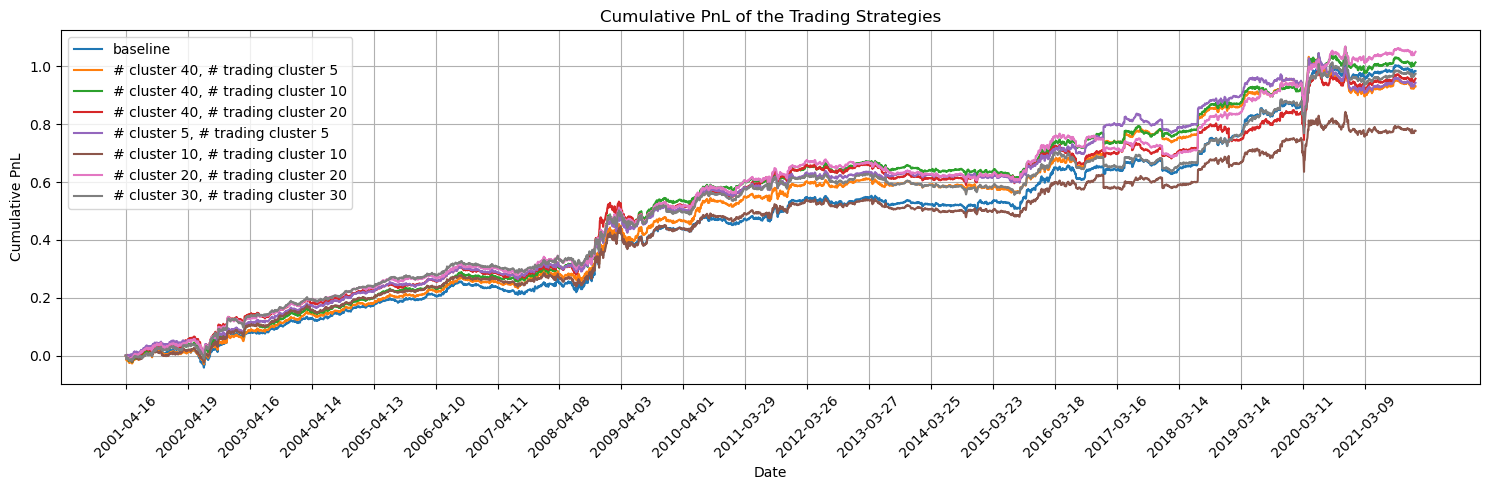

In [12]:
culmulative_pnl_l.plot(figsize=(15, 5))
plt.xlabel('Date')
plt.ylabel('Cumulative PnL')
plt.title('Cumulative PnL of the Trading Strategies')
plt.legend(run_names)
plt.grid(True)
# Add more information to the x-axis
plt.xticks(
    ticks=range(0, len(culmulative_pnl_l.index), 250),
    labels=[pd.to_datetime(culmulative_pnl_l.index[i]).date() for i in range(0, len(culmulative_pnl_l.index), 250)],
    rotation=45
)

plt.tight_layout()
plt.show()

In [14]:
fig, ax = plt.subplots(figsize=(15, 5))
culmulative_pnl_l.plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative PnL')
ax.set_title('Cumulative PnL of the Trading Strategies')
ax.legend(run_names)
ax.grid(True)  # This ensures the grid is on the exported plot

# Add more information to the x-axis
ax.set_xticks(
    range(0, len(culmulative_pnl_l.index), 250)
)
ax.set_xticklabels(
    [pd.to_datetime(culmulative_pnl_l.index[i]).date() for i in range(0, len(culmulative_pnl_l.index), 250)],
    rotation=45
)
pdf_path = "results/cumulative_pnl_strategies.pdf"
fig.tight_layout()
fig.savefig(pdf_path, format='pdf')
plt.close(fig)

In [32]:
fig.savefig(pdf_path, format='pdf')
print(f"Figure saved to {pdf_path}")

Figure saved to /Users/lunjizhu/Desktop/MATH 285J Project Workspace/spectral_clustering_finance/results/cumulative_pnl_strategies.pdf


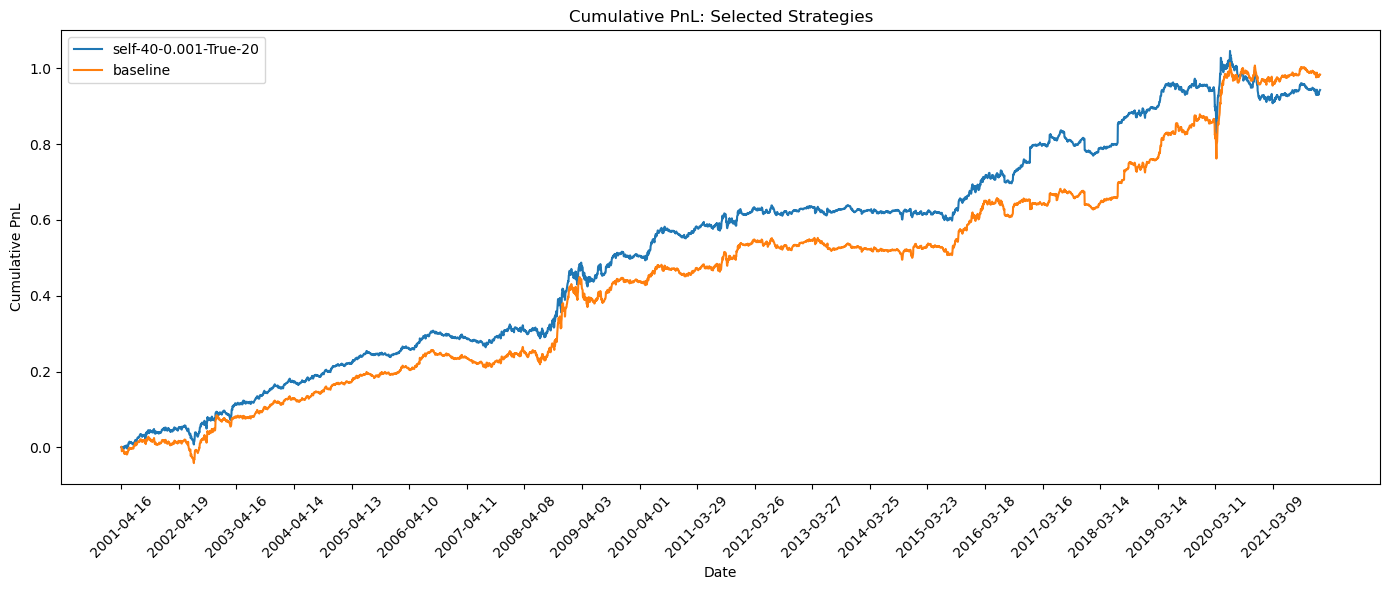

In [50]:
selected_runs = ['self-40-0.001-True-20', 'baseline']
selected_indices = [run_names.index(name) for name in selected_runs]

culmulative_pnl_selected = culmulative_pnl_l.iloc[:, selected_indices]
culmulative_pnl_selected.columns = selected_runs

culmulative_pnl_selected.plot(figsize=(14, 6))
plt.xlabel('Date')
plt.ylabel('Cumulative PnL')
plt.title('Cumulative PnL: Selected Strategies')
plt.legend()
plt.xticks(
    ticks=range(0, len(culmulative_pnl_selected.index), 250),
    labels=[pd.to_datetime(culmulative_pnl_selected.index[i]).date() for i in range(0, len(culmulative_pnl_selected.index), 250)],
    rotation=45
)
plt.tight_layout()
plt.show()

In [ ]:
def sharpe_ratio(series):
    # Assume daily returns, risk-free rate = 0
    mean_return = series.mean()
    std_return = series.std()
    if std_return == 0:
        return float('nan')
    return (mean_return / std_return) * (252 ** 0.5)

def success_rate(series):
    # Fraction of days with positive return
    return (series > 0).mean()

for col in culmulative_pnl_selected.columns:
    returns = culmulative_pnl_selected[col].diff().dropna()
    sr = sharpe_ratio(returns)
    sr_str = f"{sr:.3f}" if pd.notnull(sr) else "nan"
    succ = success_rate(returns)
    print(f"{col}: Sharpe Ratio = {sr_str}, Success Rate = {succ:.2%}")

self-40-0.001-True-20: Sharpe Ratio = 0.870, Success Rate = 51.74%
baseline: Sharpe Ratio = 0.934, Success Rate = 51.99%


In [37]:
3167.64/60

52.794

In [33]:
result_df_l = pd.concat([result_df_l.iloc[[0]], result_df_l], ignore_index=True)
print(result_df_l.iloc[:, :12].head())

   num_dates num_med  num_clusters  win_threshold  cluster_selection  \
0        NaN    self            40          0.001              False   
1        NaN    self            40          0.001              False   
2        NaN    self            40          0.001               True   
3        NaN    self            40          0.001               True   
4        NaN    self             5          0.001              False   

   num_trading_clusters weight_type  winsorize_raw  winsorize_res  \
0                    40     uniform          False          False   
1                    40     uniform          False          False   
2                     5     uniform          False          False   
3                    10     uniform          False          False   
4                     5     uniform          False          False   

   winsor_param  sharpe_ratio  success_rate  
0           0.0      0.935421      0.527091  
1           0.0      0.935421      0.527091  
2           0.

In [37]:
# Compute final cumulative PnL, Sharpe Ratio, and success rate for each run, avoiding NaNs
def sharpe_ratio(series):
    series = series.dropna()
    if len(series) == 0:
        return float('nan')
    mean_return = series.mean()
    std_return = series.std()
    if std_return == 0 or pd.isna(std_return):
        return float('nan')
    return (mean_return / std_return) * (252 ** 0.5)

def success_rate(series):
    series = series.dropna()
    if len(series) == 0:
        return float('nan')
    return (series > 0).mean()

comparison = []
for idx, name in enumerate(run_names):
    pnl_series = culmulative_pnl_l.iloc[:, idx].dropna()
    if pnl_series.empty:
        final_pnl = float('nan')
        sr = float('nan')
        succ = float('nan')
    else:
        returns = pnl_series.diff().dropna()
        final_pnl = pnl_series.iloc[-1]
        sr = sharpe_ratio(returns)
        succ = success_rate(returns)
    comparison.append({
        'Run Name': name,
        'Final Cumulative PnL': final_pnl,
        'Sharpe Ratio': sr,
        'Success Rate': succ
    })

comparison_df = pd.DataFrame(comparison)
print(comparison_df)

                             Run Name  Final Cumulative PnL  Sharpe Ratio  \
0                            baseline              0.983313      0.934154   
1   # cluster 40, # trading cluster 5              0.930600      0.856882   
2  # cluster 40, # trading cluster 10              1.013241      0.942448   
3  # cluster 40, # trading cluster 20              0.957010      0.873157   
4  # cluster 40, # trading cluster 31              0.773128      0.711620   
5    # cluster 5, # trading cluster 5              0.942771      0.869968   
6  # cluster 10, # trading cluster 10              0.776835      0.716117   
7  # cluster 20, # trading cluster 20              1.049930      0.962499   
8  # cluster 30, # trading cluster 30              0.973835      0.922505   

   Success Rate  
0      0.519885  
1      0.516234  
2      0.522767  
3      0.521806  
4      0.517288  
5      0.517387  
6      0.523151  
7      0.518348  
8      0.521230  


Final Cumulative PnL: 0.9725563393246505
Sharpe Ratio: 0.9225047497433704
Success Rate: 52.12%
